# EDA - BTS, FAA

## BTS
Explore the BTS data set to prepare for feature selection

In [1]:
import pandas as pd
import sqlite3
import time
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Import the combined dataset from sqlite.
connection = sqlite3.connect('/home/ccecilia/Downloads/bts_on_time.db')
cursor = connection.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_names = cursor.fetchall()
# Print the table names
for name in table_names:
    print(name[0])

on_time
MASTER
DEREG


In [3]:
# 'on_time' is the BTS table. 
'''
cursor.execute("SELECT count(*) FROM on_time;")
cursor.fetchall()
'''

[(51915773,)]

In [4]:
# check the columns and its type
'''
cursor.execute(f"PRAGMA table_info(on_time);")
cursor.fetchall()
'''

[(0, 'Year', 'INTEGER', 0, None, 0),
 (1, 'Quarter', 'INTEGER', 0, None, 0),
 (2, 'Month', 'INTEGER', 0, None, 0),
 (3, 'DayofMonth', 'INTEGER', 0, None, 0),
 (4, 'DayOfWeek', 'INTEGER', 0, None, 0),
 (5, 'FlightDate', 'TIMESTAMP', 0, None, 0),
 (6, 'Reporting_Airline', 'TEXT', 0, None, 0),
 (7, 'DOT_ID_Reporting_Airline', 'INTEGER', 0, None, 0),
 (8, 'IATA_CODE_Reporting_Airline', 'TEXT', 0, None, 0),
 (9, 'Tail_Number', 'TEXT', 0, None, 0),
 (10, 'Flight_Number_Reporting_Airline', 'INTEGER', 0, None, 0),
 (11, 'OriginAirportID', 'INTEGER', 0, None, 0),
 (12, 'OriginAirportSeqID', 'INTEGER', 0, None, 0),
 (13, 'OriginCityMarketID', 'INTEGER', 0, None, 0),
 (14, 'Origin', 'TEXT', 0, None, 0),
 (15, 'OriginCityName', 'TEXT', 0, None, 0),
 (16, 'OriginState', 'TEXT', 0, None, 0),
 (17, 'OriginStateFips', 'INTEGER', 0, None, 0),
 (18, 'OriginStateName', 'TEXT', 0, None, 0),
 (19, 'OriginWac', 'INTEGER', 0, None, 0),
 (20, 'DestAirportID', 'INTEGER', 0, None, 0),
 (21, 'DestAirportSeqID', 

### Select columns from 'on_time' table

In [7]:
# It takes about 2 minutes
start_time = time.time()

# Open a new cursor
cursor.execute("SELECT Year, IATA_CODE_Reporting_Airline, DepDelayMinutes, ArrDelayMinutes FROM on_time;")
on_time_for_groupby = pd.DataFrame(cursor.fetchall(), columns=['Year','IATA_CODE_Reporting_Airline', 'DepDelayMinutes', 'ArrDelayMinutes'])

# Calculate and print the elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

Elapsed time: 115.2873 seconds


### Group by years to yield average departure delay minutes and arriaval delay minutes of each airlines from 2015 to 2023 June

In [8]:
start_time = time.time()
on_time_for_groupby['Year'] = on_time_for_groupby['Year'].astype(str)
# Remove rows with empty strings in 'DepDelayMinutes' and 'ArrDelayMinutes'
on_time_for_groupby = on_time_for_groupby[(on_time_for_groupby['DepDelayMinutes'] != '') & (on_time_for_groupby['ArrDelayMinutes'] != '')]

# Convert 'DepDelayMinutes' and 'ArrDelayMinutes' to float
on_time_for_groupby['DepDelayMinutes'] = on_time_for_groupby['DepDelayMinutes'].astype(float)
on_time_for_groupby['ArrDelayMinutes'] = on_time_for_groupby['ArrDelayMinutes'].astype(float)

on_time_groupby = on_time_for_groupby.groupby(['Year', 'IATA_CODE_Reporting_Airline']).mean().reset_index()
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

Elapsed time: 81.8009 seconds


### Plot by year

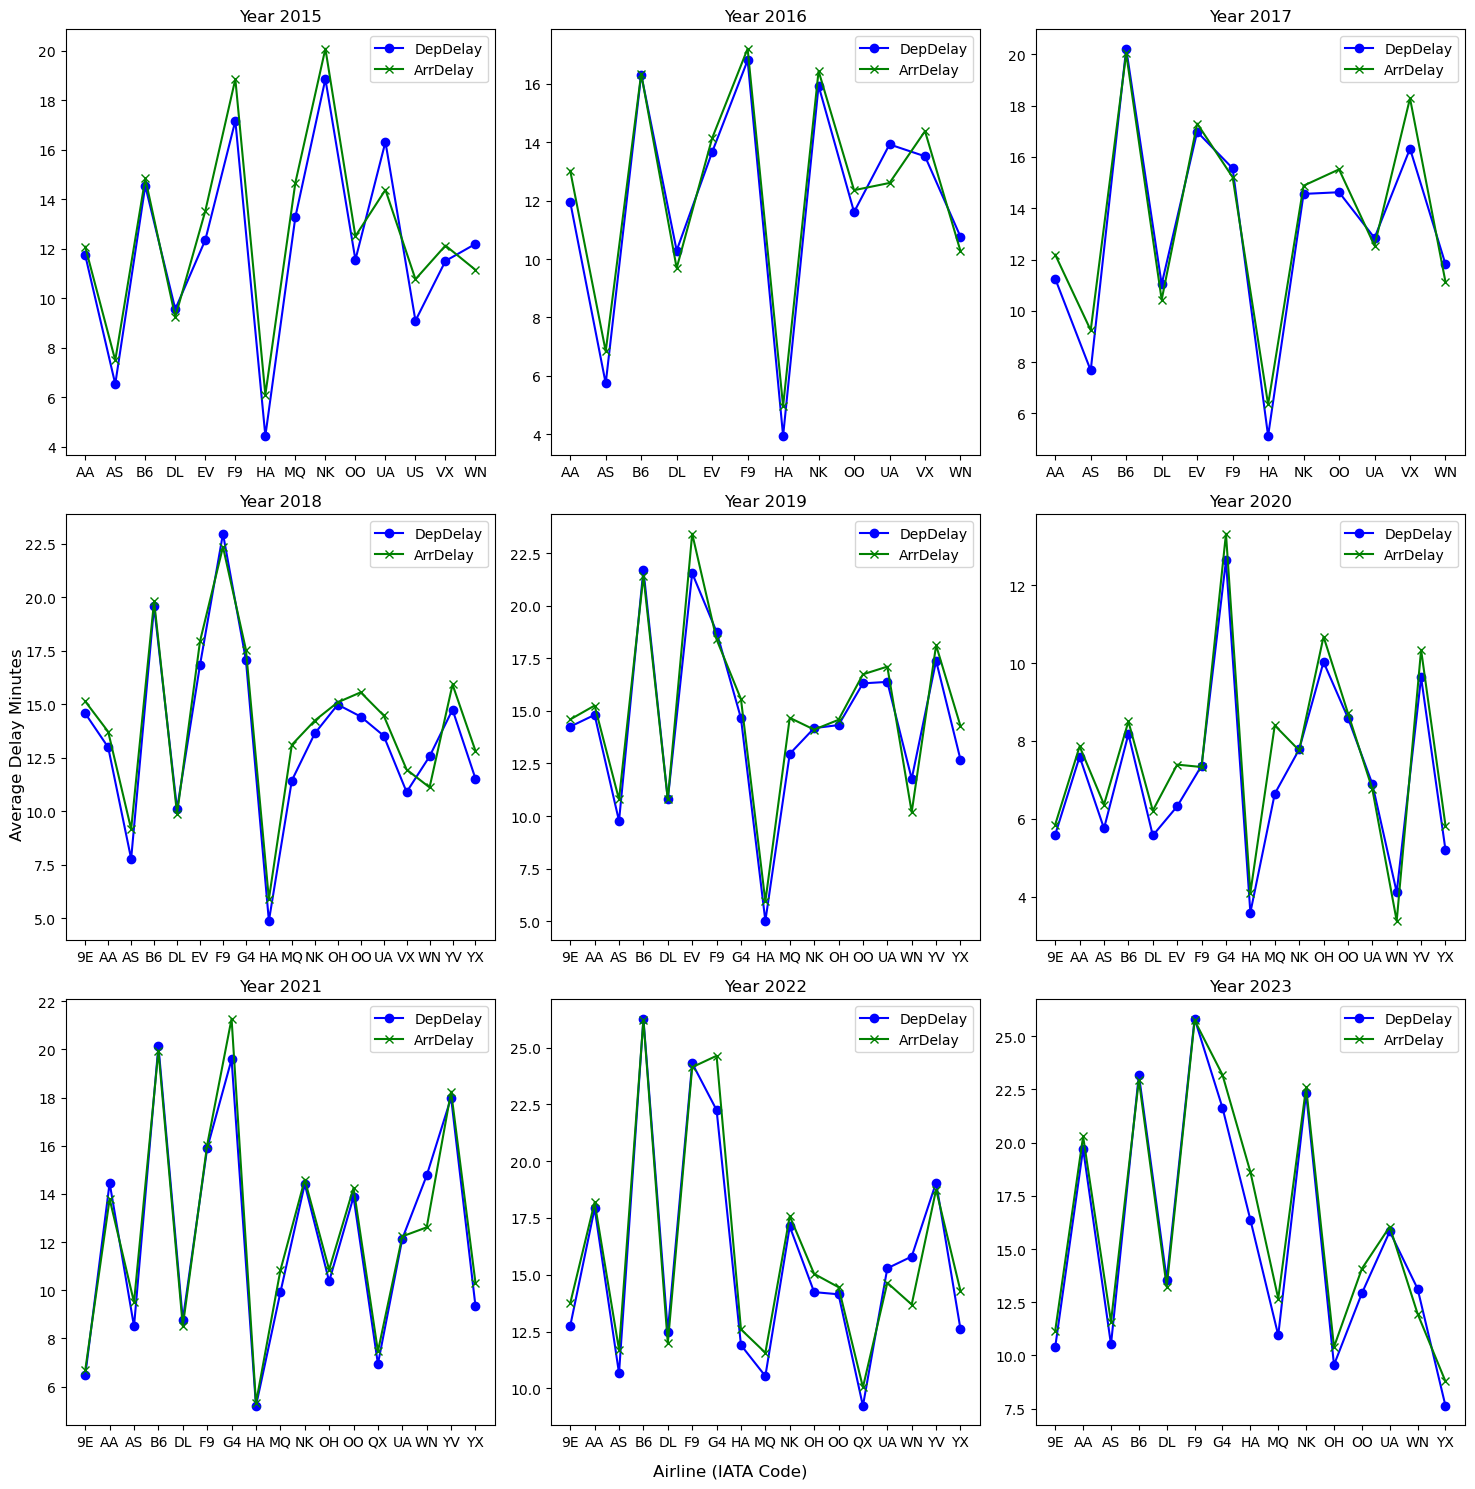

In [9]:
# Plot delay minutes of each airlines from 2015 to 2023
on_time_groupby_sorted = on_time_groupby.sort_values(by='IATA_CODE_Reporting_Airline')
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
# Initialize lists to store legend handles and labels
handles, labels = [], []

# Loop through each year and plot the data
for i, year in enumerate(['2015','2016','2017','2018','2019','2020','2021','2022','2023']):
    row, col = divmod(i, 3)  # Calculate the subplot row and column
    ax = axes[row, col]
    group = on_time_groupby_sorted[on_time_groupby_sorted['Year'] == year]
    
    # Plot 'DepDelayMinutes' and 'ArrDelayMinutes' as line plots with different colors
    ax.plot(group['IATA_CODE_Reporting_Airline'], group['DepDelayMinutes'], marker='o', label='DepDelay', color='blue')
    ax.plot(group['IATA_CODE_Reporting_Airline'], group['ArrDelayMinutes'], marker='x', label='ArrDelay', color='green')
    
    ax.set_title(f'Year {year}')
    ax.legend()
    
fig.supxlabel('Airline (IATA Code)')
fig.supylabel('Average Delay Minutes')


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

### Plot by airlines

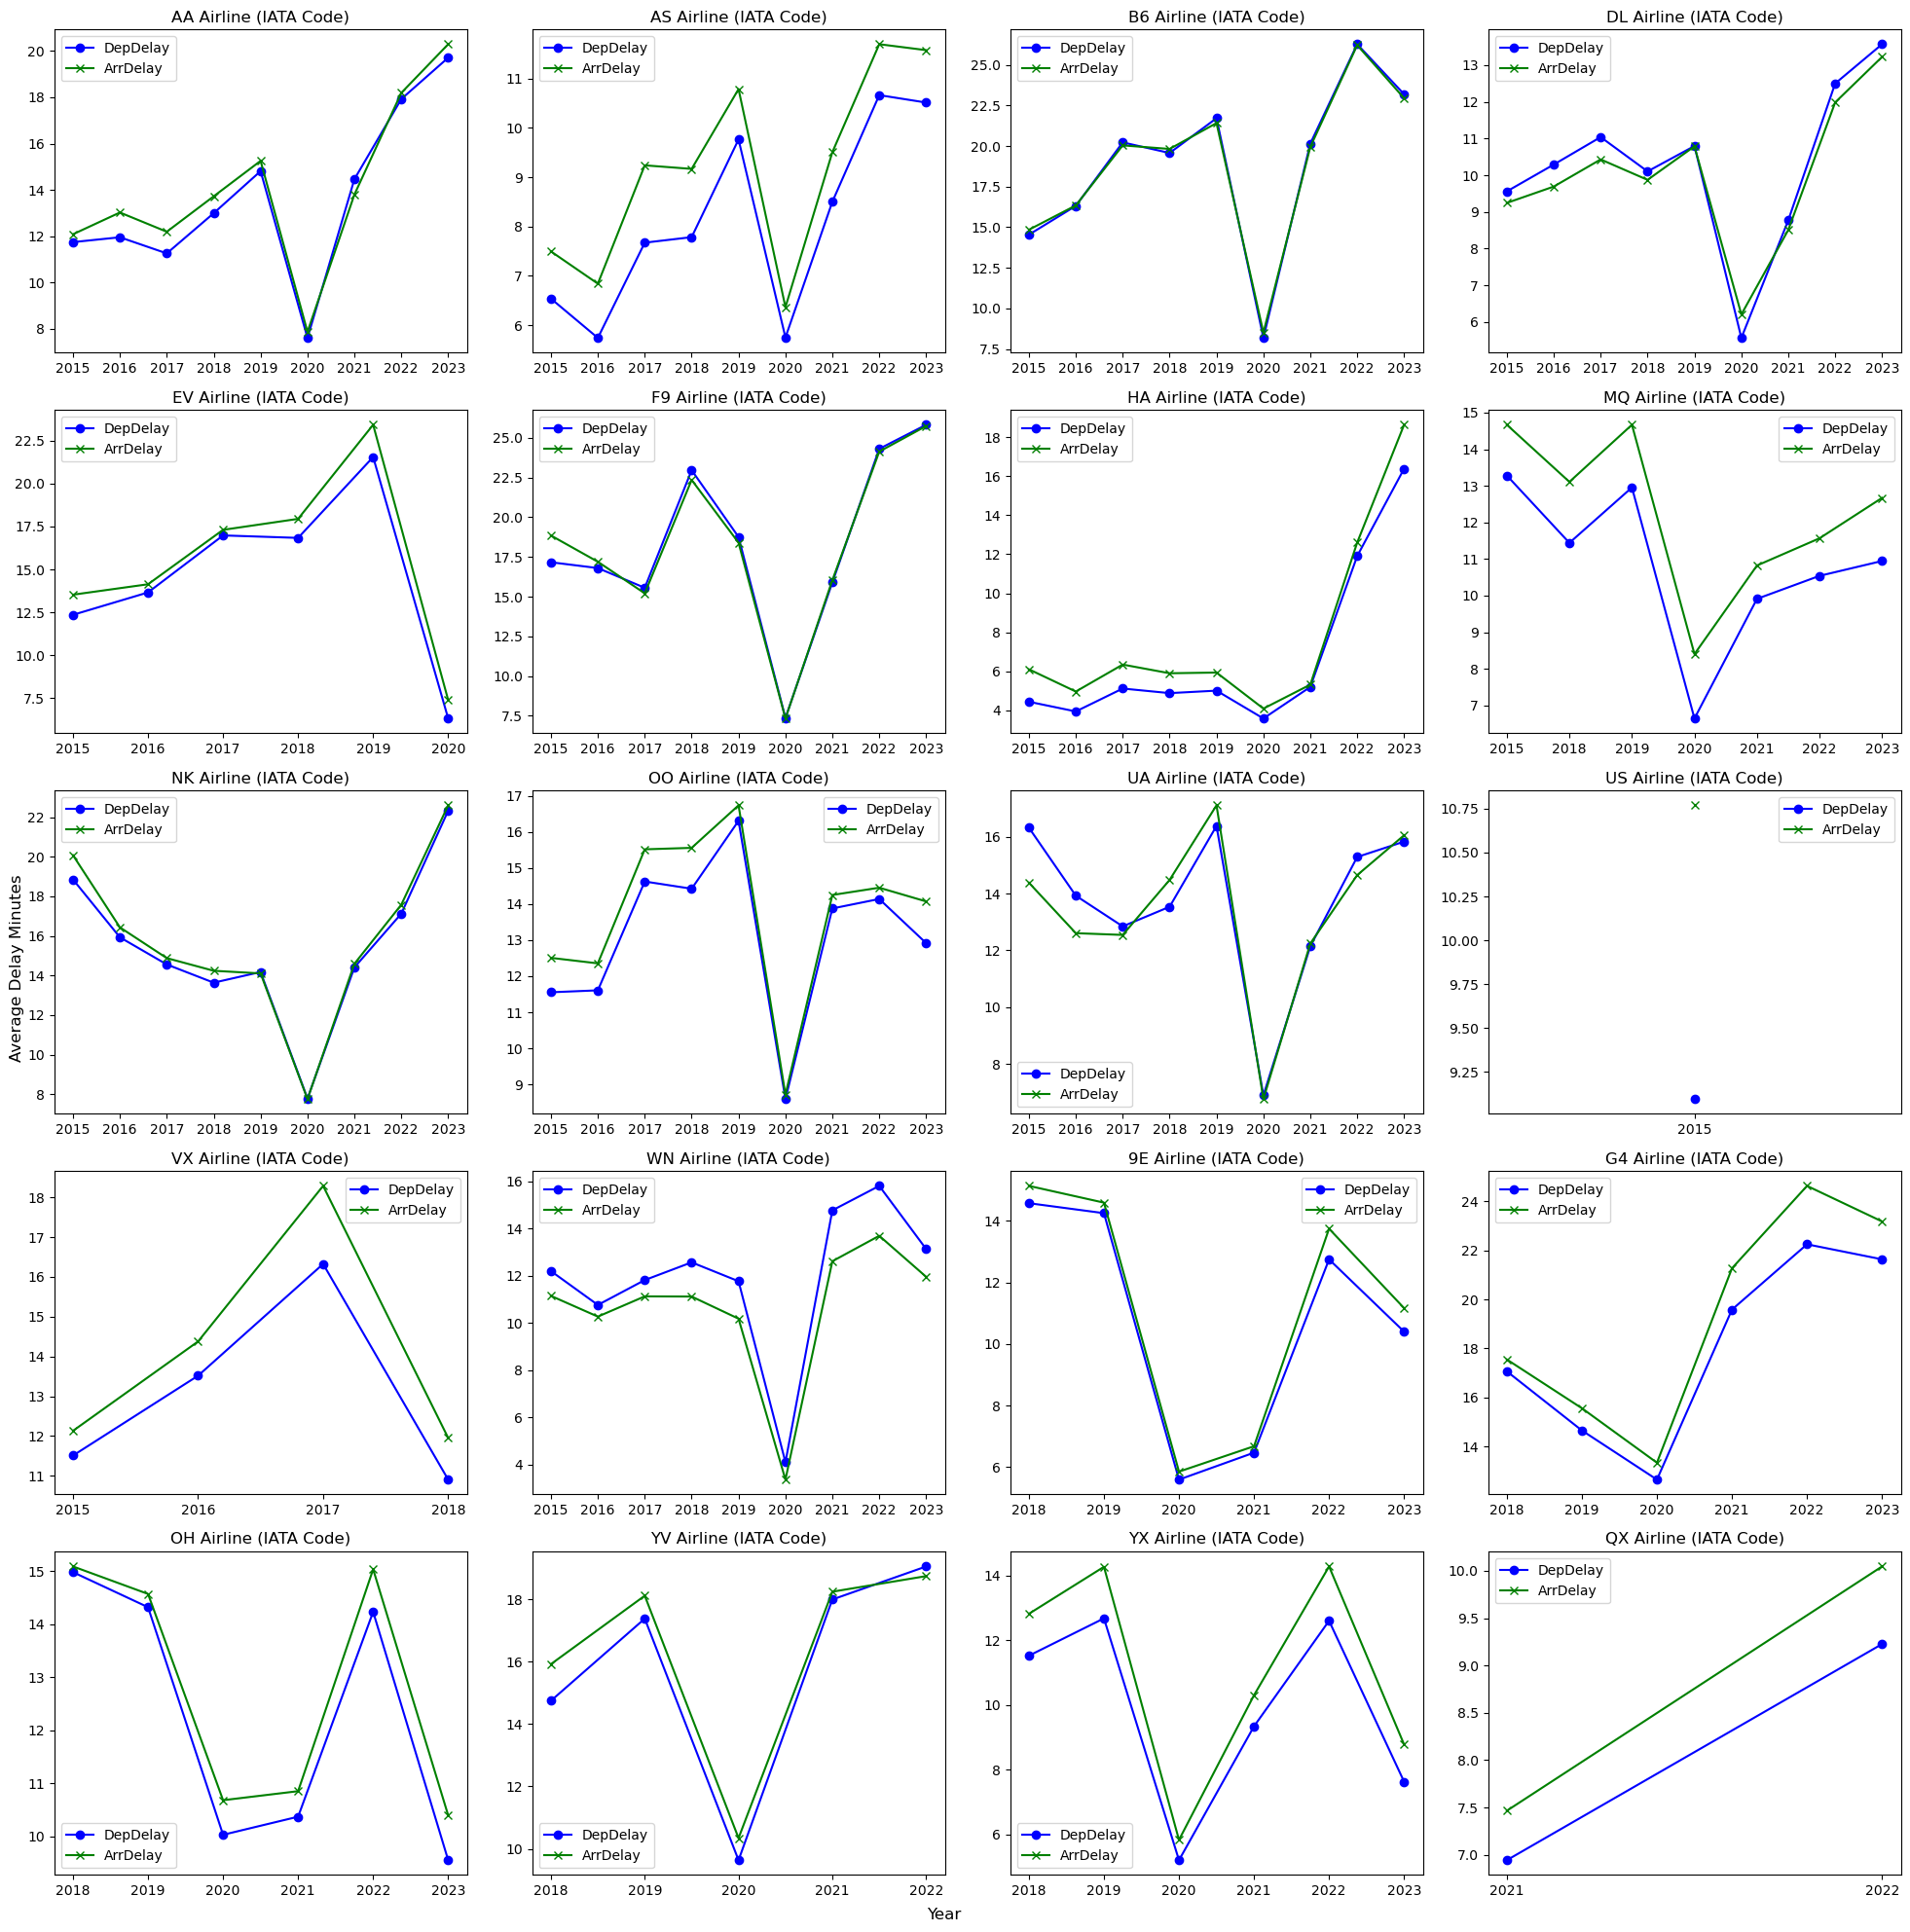

In [10]:
#on_time_groupby_sorted = on_time_groupby.sort_values(by='DepDelayMinutes', ascending=False)
airlines = on_time_groupby['IATA_CODE_Reporting_Airline'].unique()
# Create a 5x4 grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

# Loop through each airline and plot the data

for i, airline in enumerate(airlines):
    row, col = divmod(i, 4)  # Calculate the subplot row and column
    ax = axes[row, col]
    group = on_time_groupby[on_time_groupby['IATA_CODE_Reporting_Airline'] == airline]
    
    # Plot 'DepDelayMinutes' and 'ArrDelayMinutes' as line plots with different colors
    ax.plot(group['Year'], group['DepDelayMinutes'], marker='o', label='DepDelay', color='blue')
    ax.plot(group['Year'], group['ArrDelayMinutes'], marker='x', label='ArrDelay', color='green')
    
    ax.set_title(f'{airline} Airline (IATA Code)')
    ax.legend()
fig.supxlabel('Year')
fig.supylabel('Average Delay Minutes')
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

From the above analysis, some airlines have less historical data due to business changes. So the analysis will mainly focus on below airlines.

**AA** - 2015-2023 US - 2015 (Business merge)

**AS** - 2015-2023 VX - 2015-2018, QX - 2021-2022 (Business merge)

**B6** - 2015-2023

**DL** - 2015-2023

**EV** - 2015-2020 (Ceased operations on August 22, 2022)

**F9** - 2015-2023

**HA** - 2015-2023

**MQ** - 2015-2023

**NK** - 2015-2023

**OO** - 2015-2023

**UA** - 2015-2023

**WN** - 2015-2023

**9E** - 2018-2023 (a wholly-owned subsidiary of Delta Air Lines)

**G4** - 2018-2023

**OH** - 2018-2023

**YX** - 2018-2023

**YV** - 2018-2022 (Mesa Airlines operates flights on behalf of United Airlines, and DHL Express.)


Many airlines seems on-time in 2020. It may due to largely flight cancellations. Below plots reflect our assumptions.

In [14]:
# It takes about 2 minutes
start_time = time.time()

# Open a new cursor
cursor.execute("SELECT Year, IATA_CODE_Reporting_Airline FROM on_time WHERE Cancelled=='1';")
canceled_flights = pd.DataFrame(cursor.fetchall(), columns=['Year','IATA_CODE_Reporting_Airline'])

# Calculate and print the elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

Elapsed time: 50.1083 seconds


In [40]:
# Close the cursor and connection
cursor.close()
connection.close()

In [22]:
canceled_flights_count = canceled_flights.groupby(['Year', 'IATA_CODE_Reporting_Airline']).size().reset_index(name='Count')
canceled_flights_count

,Year,IATA_CODE_Reporting_Airline,Count
0,2015,AA,10919
1,2015,AS,669
2,2015,B6,4276
3,2015,DL,3824
4,2015,EV,15231
...,...,...,...
134,2023,OH,672
135,2023,OO,5221
136,2023,UA,2679
137,2023,WN,8365


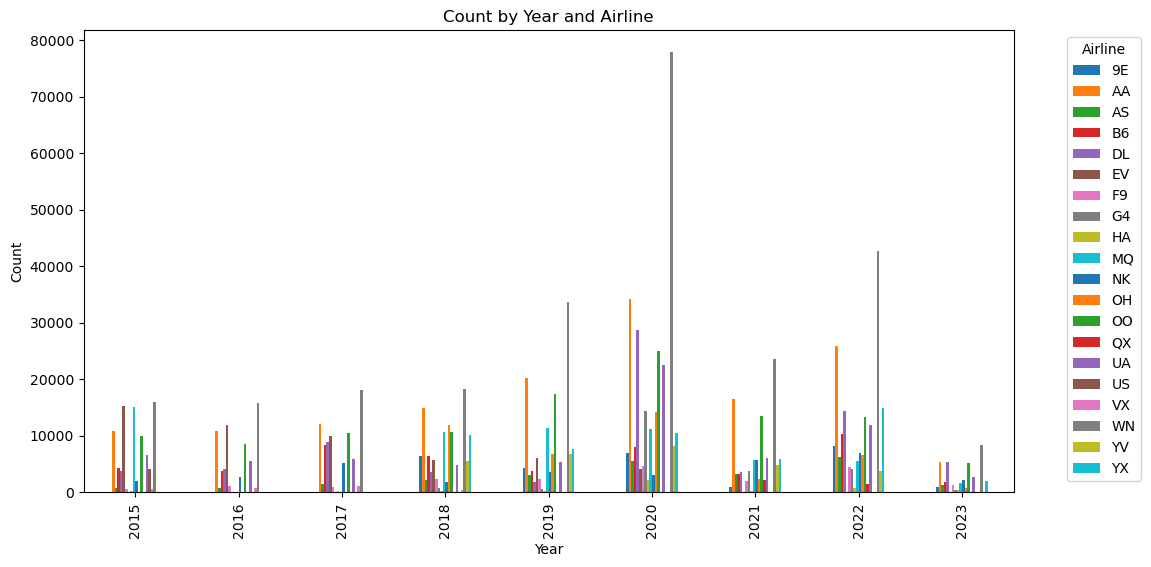

In [24]:
# Create a pivot table to reshape the data for plotting
pivot_df = canceled_flights_count.pivot(index='Year', columns='IATA_CODE_Reporting_Airline', values='Count')

# Plot the data
pivot_df.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count by Year and Airline')
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

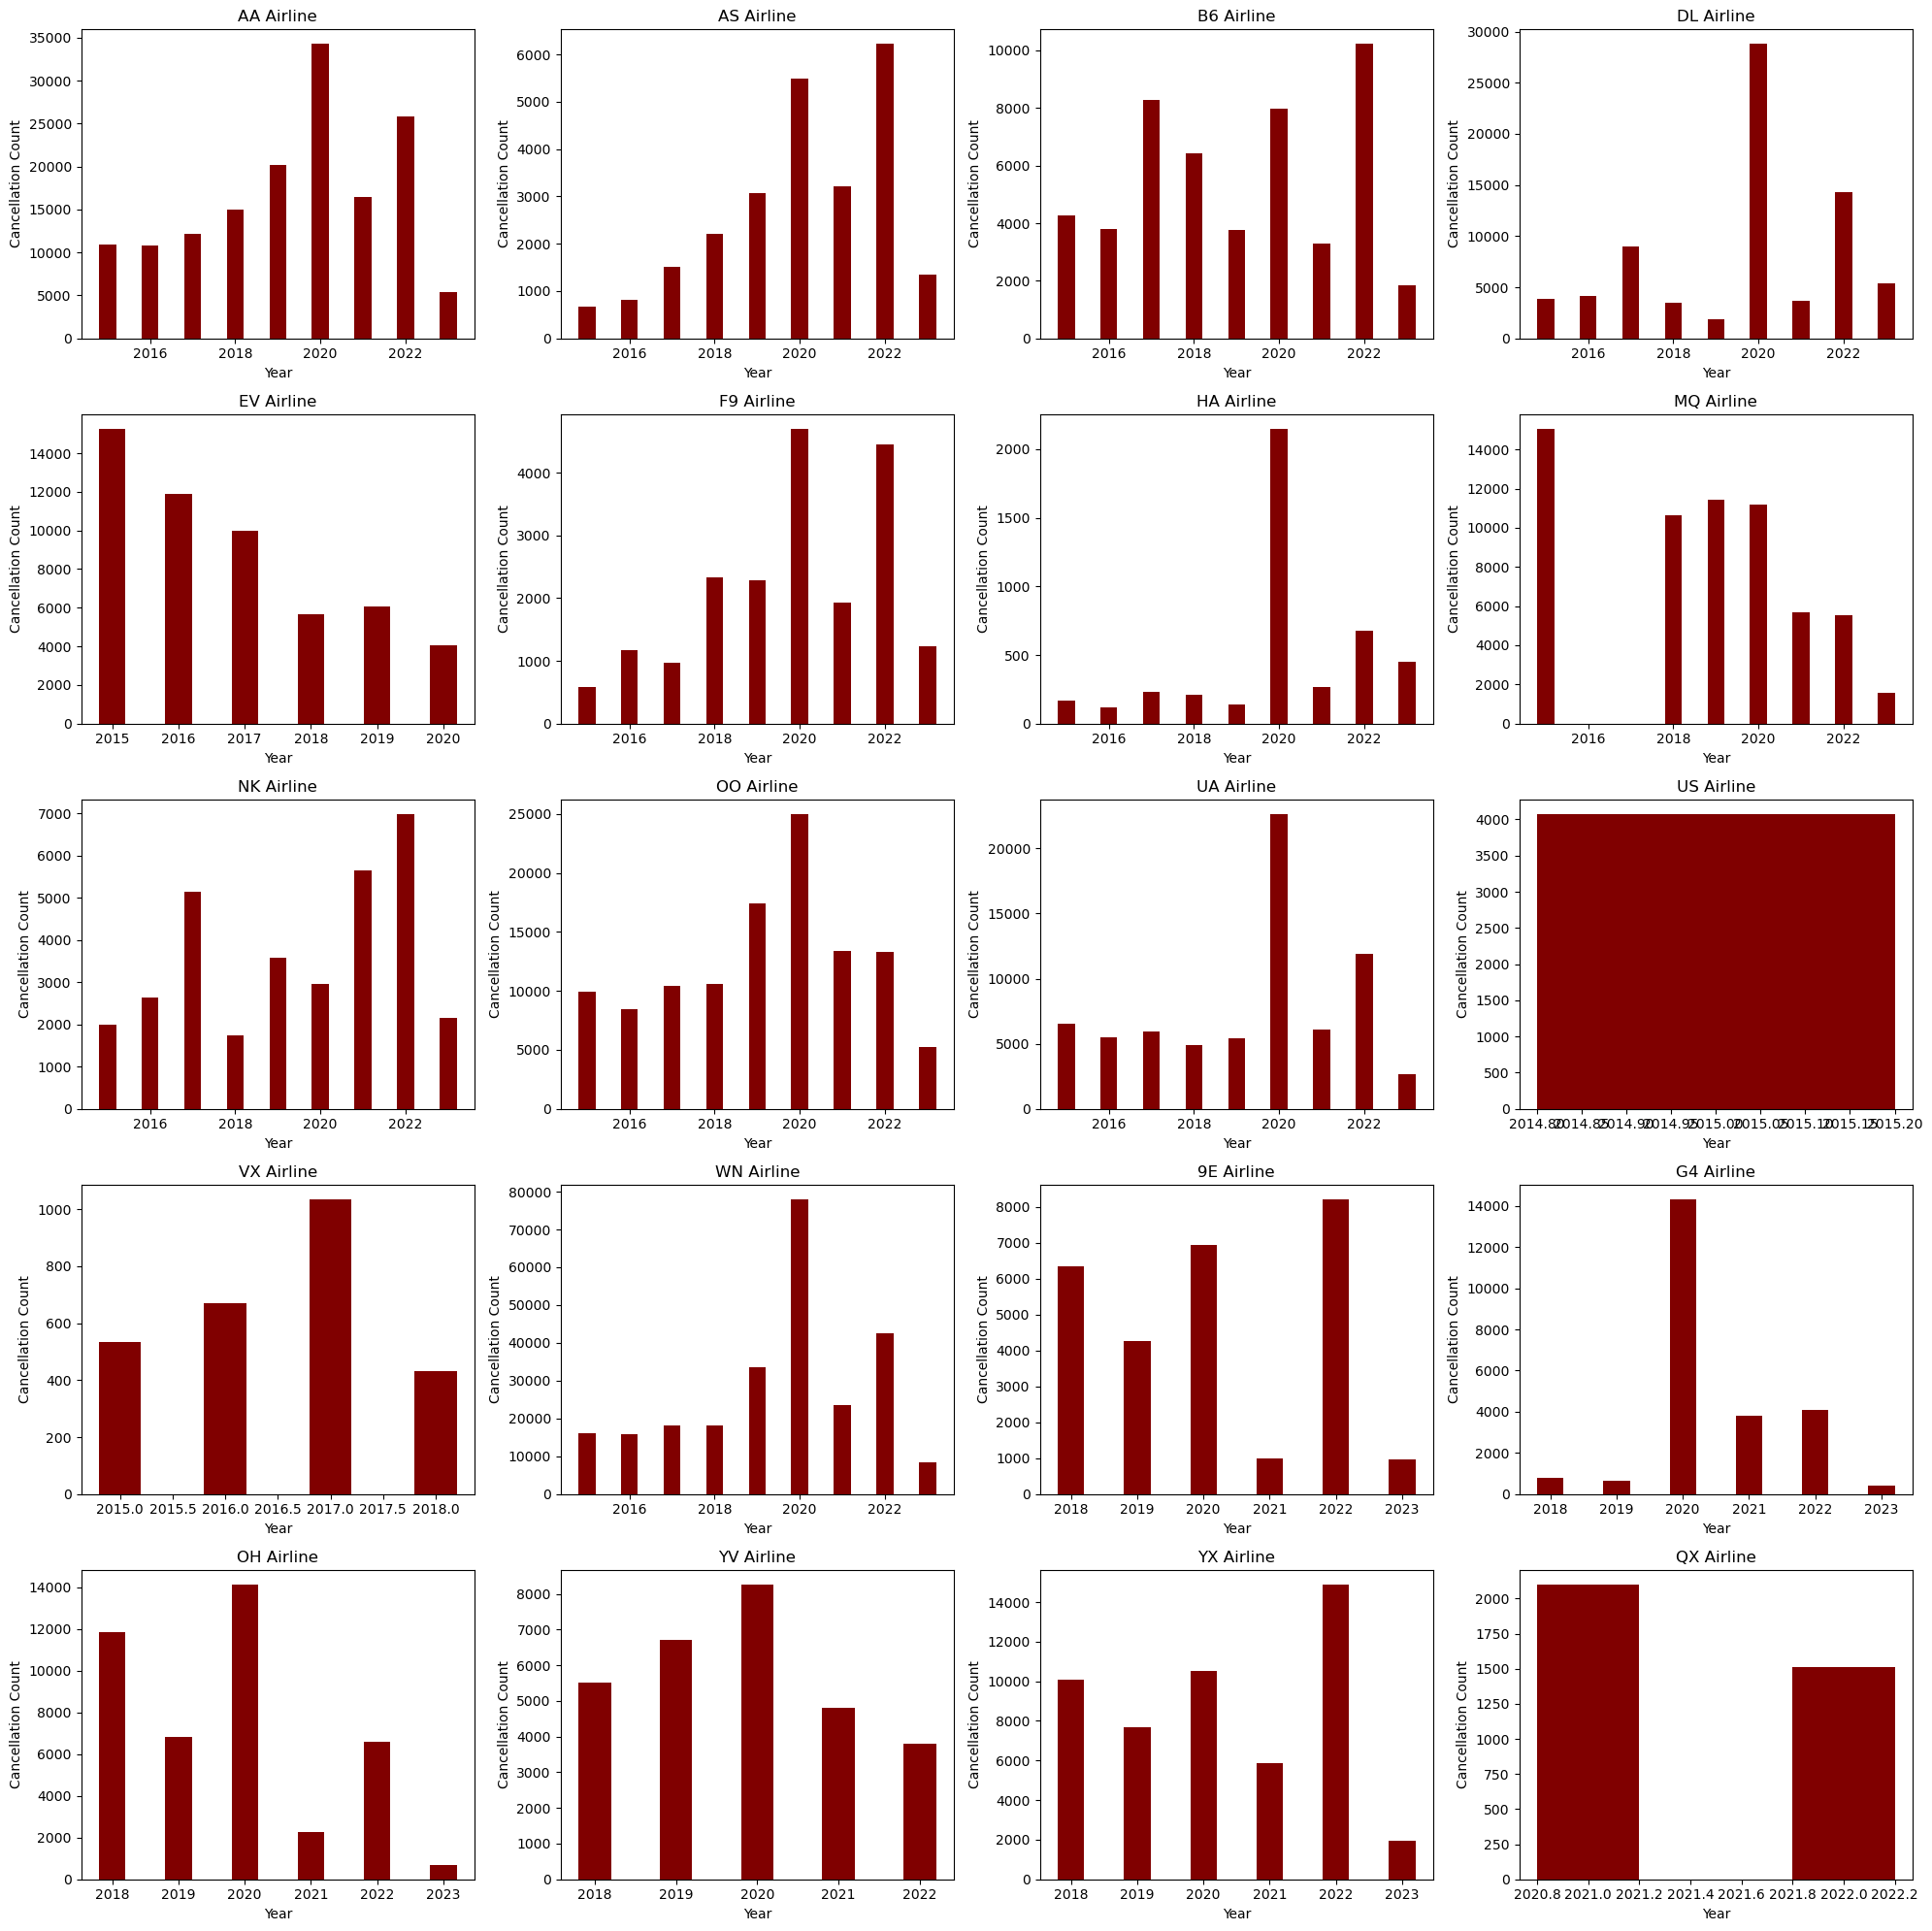

In [38]:
# Create subplots for each airline
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

# Loop through each airline and create a separate bar plot
for i, airline in enumerate(airlines):
    row, col = divmod(i, 4)  # Calculate the subplot row and column
    ax = axes[row, col]
    cancelled_airlien = canceled_flights_count[canceled_flights_count['IATA_CODE_Reporting_Airline'] == airline]
        
    # Creating the bar plot
    ax.bar(cancelled_airlien['Year'], cancelled_airlien['Count'], color='maroon', width=0.4)
    
    ax.set_xlabel("Year")
    ax.set_ylabel("Cancellation Count")
    ax.set_title(f"{airline} Airline")

# Adjust spacing between subplots
plt.tight_layout()
plt.show()